<a href="https://colab.research.google.com/github/MaDy2002/MaDy2002/blob/main/ipython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

(442, 10) (442,)
the intercept is :  151.35
Coeff. of determination on train set :  0.53
Coeff. of determination on test set :  0.45
The mean absolute error is :  42.79
The root mean squared error is :  53.85


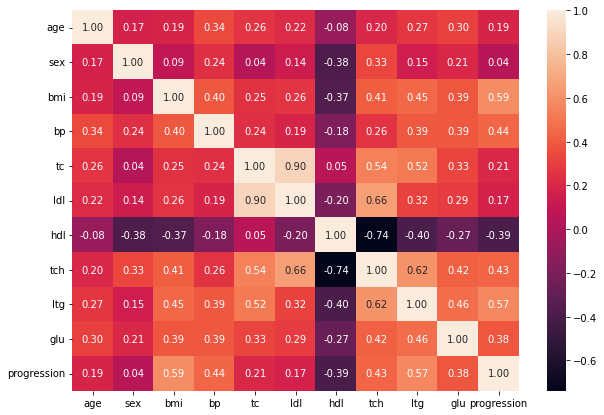

<Figure size 720x504 with 0 Axes>

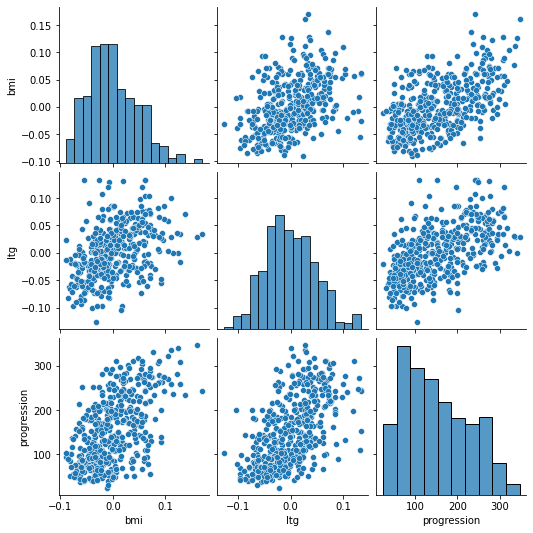

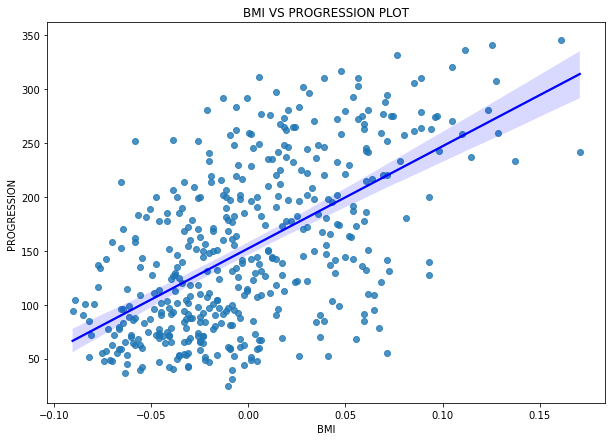

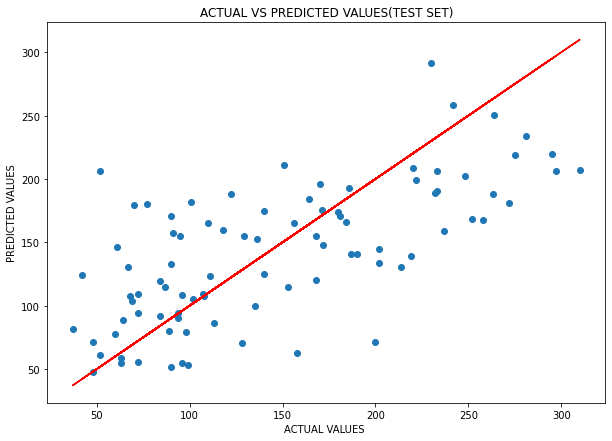

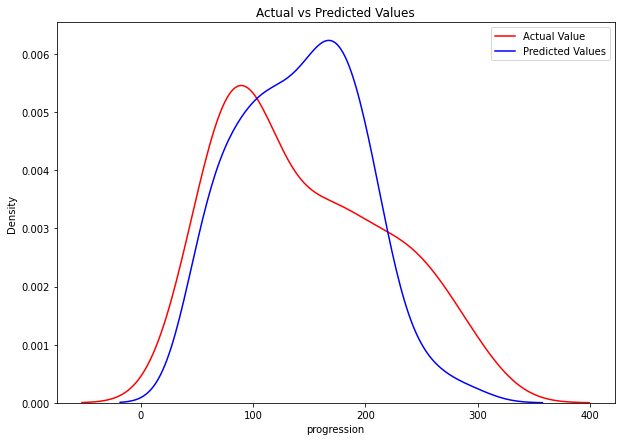

In [23]:
#plotting
import seaborn as sns

#sklearn
from sklearn.datasets import load_diabetes
#importing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures

#scipy
from scipy.stats import loguniform

#importing dataset

diab = load_diabetes()

#define feature and label
x = diab['data']
y = diab['target']

#printing shapes
print(x.shape,y.shape)

#creating dataframe from X

df = pd.DataFrame(x,columns=["age","sex","bmi","bp","tc","ldl","hdl","tch","ltg","glu"])

#adding 'progression' from y

df['progression'] = diab['target']

#showing head
df.head()

#showing dataframe info
df.isnull().sum()
df.describe()

plt.figure(figsize=(10,7))

#correlation matarix
dataplot = sns.heatmap(df.corr(),annot=True,fmt = '.2f')


#fig_size 
plt.figure(figsize=(10,7))

#plotting_figures
sns.pairplot(df[['bmi','ltg','progression']])


#linear Regression
#fig_size

plt.figure(figsize=(10,7))

#regression between bmi and progression
sns.regplot(data=df,x='bmi',y='progression',line_kws={"color" : "blue"})

#labelling
plt.title('BMI VS PROGRESSION PLOT')
plt.xlabel('BMI')
plt.ylabel('PROGRESSION')



#linearRegression Model
#defining Features
X = df.iloc[:,:-1]

#defining label

Y = df['progression']

#splitting
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

#fitting the model
reg = LinearRegression().fit(X_train,Y_train)

#predictions
Y_test_pred = reg.predict(X_test)
Y_train_pred = reg.predict(X_train)

#intercept 
print(f'the intercept is : {reg.intercept_: .2f}')

#R^2
print(f'Coeff. of determination on train set : {reg.score(X_train,Y_train): .2f}') #trainset
print(f'Coeff. of determination on test set : {reg.score(X_test,Y_test): .2f}') #testset


#model_metrics
print(f'The mean absolute error is : {metrics.mean_absolute_error(Y_test,Y_test_pred): .2f}')

print(f'The root mean squared error is : {np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)): .2f}')

#imageDimenmsions

plt.figure(figsize=(10,7))

#scatterPlot

plt.scatter(Y_test,Y_test_pred)
plt.plot(Y_test,Y_test,color='r')

#labelling
plt.title('ACTUAL VS PREDICTED VALUES(TEST SET)')
plt.xlabel('ACTUAL VALUES ')
plt.ylabel('PREDICTED VALUES')

#showing plot
plt.show()


#image_dimensions
plt.figure(figsize=(10,7))

#Kernel Density Estimation plot

ax = sns.kdeplot(Y_test,color='r',label="Actual Value") #actual values
sns.kdeplot(Y_test_pred,color="b",label="Predicted Values",ax=ax) #predicted values

#showimng title
plt.title('Actual vs Predicted Values')

#showing legend
plt.legend()

#showing plot
plt.show()